In [171]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
from typing import NoReturn

In [172]:
def modify_color(image: np.array, scale_a: float = 1.2, scale_b: float = 1.2) -> np.array:
    image[:, :, 1] = (image[:, :, 1].astype(float) * scale_a).clip(0, 255).astype(np.uint8)
    image[:, :, 2] = (image[:, :, 2].astype(float) * scale_b).clip(0, 255).astype(np.uint8)
    return image

In [173]:
def modify_bright(image: np.array, scale: float = 10) -> np.array:
    image[:, :, 0] = (image[:, :, 0].astype(float) + scale).clip(0, 255).astype(np.uint8)
    return image

In [184]:
def modify_image(image_path: str, scale_a: float, scale_b: float, delta_alpha: float) -> NoReturn:
    image: np.array = cv2.imread(image_path)
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    lab_image: np.array = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    color_modified_image: np.array = modify_color(lab_image, scale_a, scale_b)
    modified_image: np.array = modify_bright(color_modified_image, delta_alpha)
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_LAB2RGB))
    path, name = image_path.rsplit('/', 1)
    modified_image_path: str = os.path.join(path, f"modified_{name}")
    cv2.imwrite(modified_image_path, cv2.cvtColor(modified_image, cv2.COLOR_LAB2BGR))

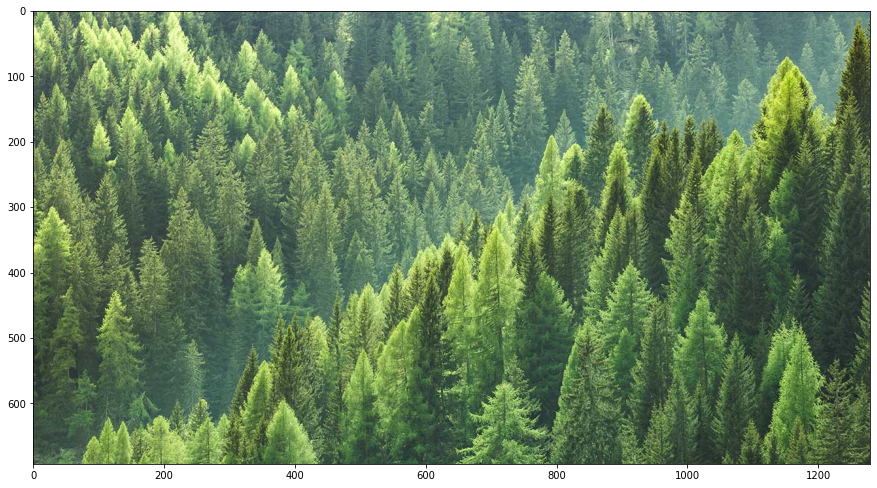

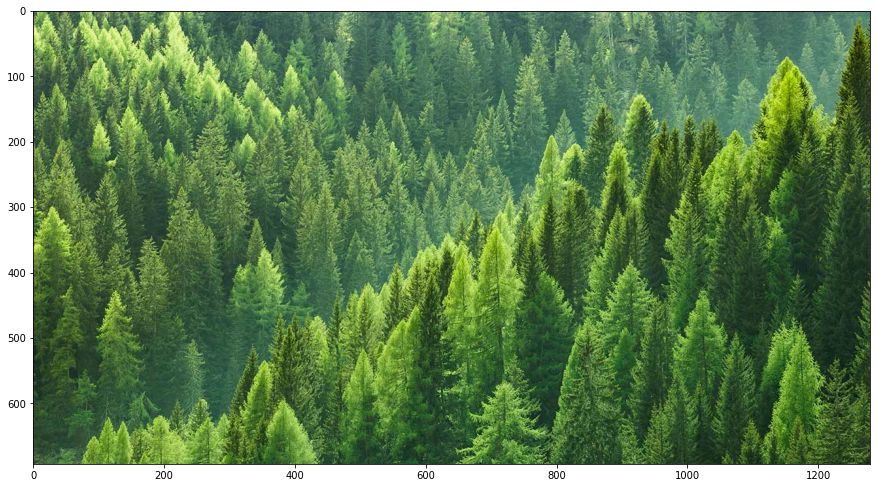

In [189]:
forest_image_path: str = os.path.join("images", "forest.jpg")
modify_image(forest_image_path, 0.95, 1.05, -10)

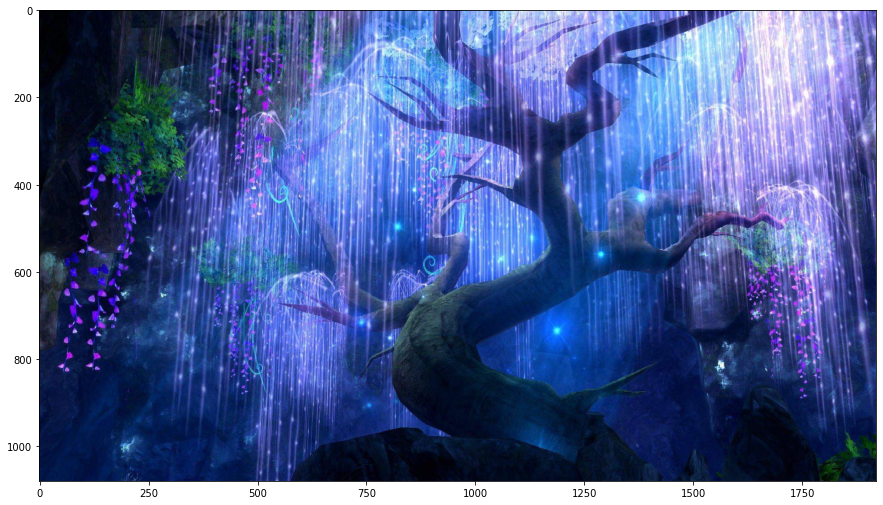

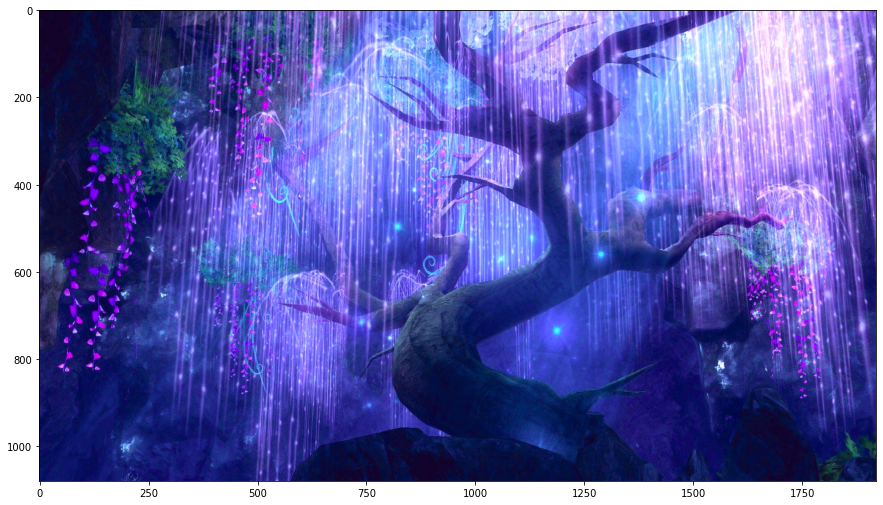

In [199]:
ocean_image_path: str = os.path.join("images", "avatar.jpeg")
modify_image(ocean_image_path, 1.11, 0.85, 7)